In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

# Cardiovascular Disease Data Set

In [2]:
cvd = Table.read_table('cardio_train.csv', sep = ';')  #  Cardiovascular Disease Data Set
cvd = cvd.drop('id')                    ## https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
cvd

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
18393,2,168,62,110,80,1,1,0,0,1,0
20228,1,156,85,140,90,3,1,0,0,1,1
18857,1,165,64,130,70,3,1,0,0,0,1
17623,2,169,82,150,100,1,1,0,0,1,1
17474,1,156,56,100,60,1,1,0,0,0,0
21914,1,151,67,120,80,2,2,0,0,0,0
22113,1,157,93,130,80,3,1,0,0,1,0
22584,2,178,95,130,90,3,3,0,0,1,1
17668,1,158,71,110,70,1,1,0,0,1,0
19834,1,164,68,110,60,1,1,0,0,0,0


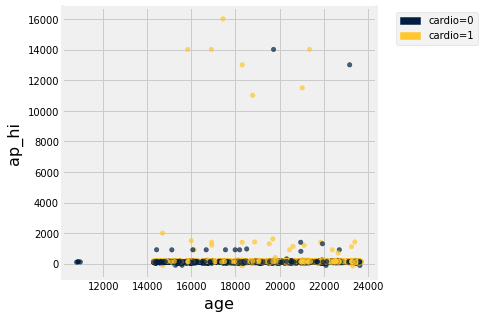

In [3]:
cvd.scatter('age', 'ap_hi', colors = 'cardio')

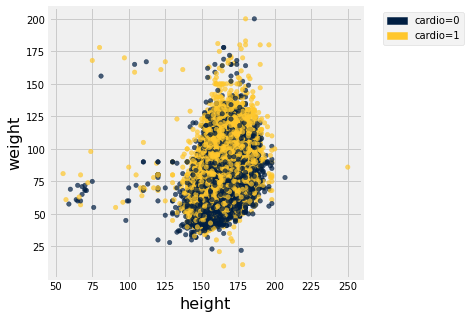

In [4]:
cvd.scatter('height', 'weight', colors = 'cardio')

In [5]:
cvd.sort('ap_hi', descending = True)  ## largest to smallest

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
17438,1,169,70,16020,80,1,1,0,0,0,1
19731,1,160,65,14020,90,1,1,0,0,1,0
16910,2,180,78,14020,90,1,1,0,0,1,1
21361,1,169,71,14020,80,3,3,0,0,1,1
15835,2,169,75,14020,80,2,1,0,0,1,1
23182,1,161,105,13010,80,1,1,0,0,0,0
18307,1,152,76,13010,80,2,2,0,0,1,1
21032,1,175,80,11500,90,1,1,0,0,1,1
18784,2,168,65,11020,80,1,1,0,0,1,1
14696,1,170,74,2000,100,2,1,0,0,1,1


In [6]:
cvd.sort('ap_hi', descending = False)  ## smallest to largest

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23325,2,168,59,-150,80,1,1,0,0,1,1
18301,1,162,74,-140,90,1,1,0,0,1,1
14711,2,168,50,-120,80,2,1,0,0,0,1
23646,2,160,59,-120,80,1,1,0,0,0,0
22108,2,161,90,-115,70,1,1,0,0,1,0
15281,1,165,78,-100,80,2,1,0,0,1,0
15581,1,153,54,-100,70,1,1,0,0,1,0
16905,2,163,63,1,2088,1,1,1,0,1,0
18716,1,171,80,1,1088,1,1,0,0,1,1
21240,1,162,69,7,80,1,1,0,0,1,0


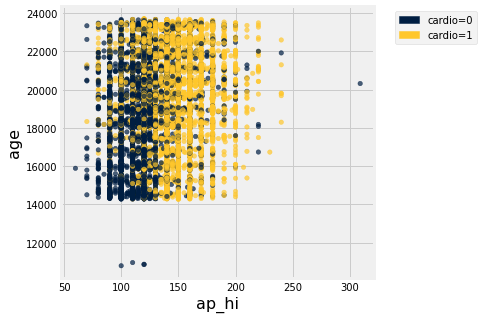

In [7]:
cvd.where('ap_hi', are.between(25, 400)).scatter('ap_hi', 'age', colors = 'cardio')

In [8]:
outliers_removed = cvd.where('ap_hi', are.between(25, 400)).where('ap_lo', are.between(10, 300))

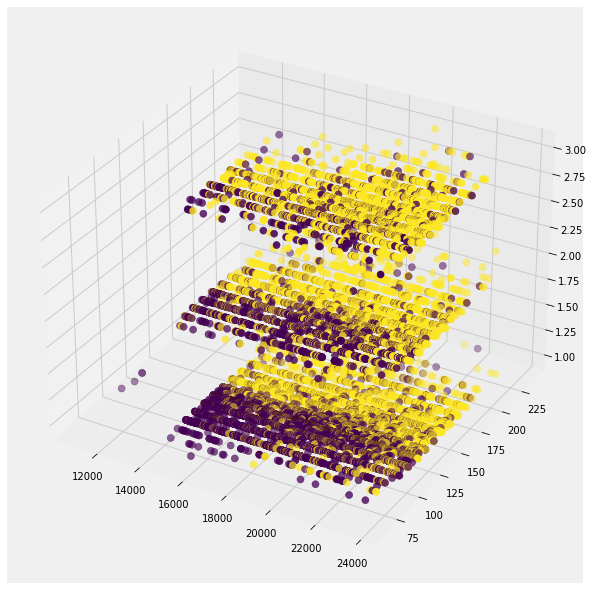

In [9]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(outliers_removed.column('age'), 
           outliers_removed.column('ap_hi'), 
           outliers_removed.column('cholesterol'), 
           c=outliers_removed.column('cardio'),
           cmap='viridis',
           s=50);

# Breast Cancer Data Set

In [10]:
bcd = Table.read_table('data.csv')  ## Wisconsin Breast Cancer Data Set by UCI Machine Learning
bcd = bcd.drop('id', "Unnamed: 32")  ## https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
bcd

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678
M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072
M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075


In [11]:
bcd.group('diagnosis')

diagnosis,count
B,357
M,212


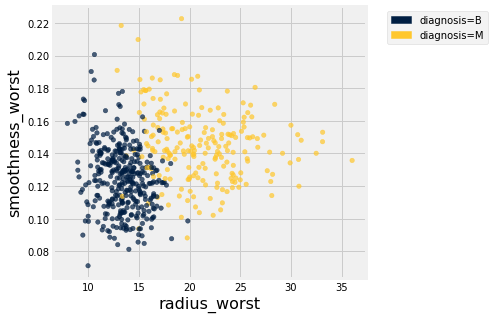

In [12]:
bcd.scatter('radius_worst', 'smoothness_worst', colors='diagnosis')

In [13]:
gbc = Table.read_table('Breast_cancer_data.csv')  #  Breast Cancer Data Wisconsin by AI for Social Good: Women Coders' Bootcamp
gbc  ## https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
17.99,10.38,122.8,1001,0.1184,0
20.57,17.77,132.9,1326,0.08474,0
19.69,21.25,130,1203,0.1096,0
11.42,20.38,77.58,386.1,0.1425,0
20.29,14.34,135.1,1297,0.1003,0
12.45,15.7,82.57,477.1,0.1278,0
18.25,19.98,119.6,1040,0.09463,0
13.71,20.83,90.2,577.9,0.1189,0
13,21.82,87.5,519.8,0.1273,0
12.46,24.04,83.97,475.9,0.1186,0


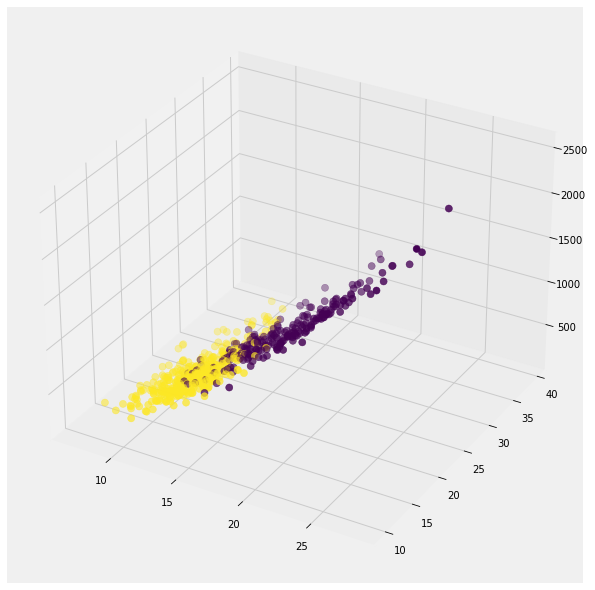

In [14]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(gbc.column('mean_radius'), 
           gbc.column('mean_texture'), 
           gbc.column('mean_area'), 
           c=gbc.column('diagnosis'),
           cmap='viridis',
           s=50);